In [311]:
import pandas as pd
import matplotlib
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import STL
from pathlib import Path


matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [312]:
df = pd.read_csv(Path.cwd().parent / "data" / "consumption_temp.csv")
df["time"] = pd.to_datetime(df["time"])
df = df.set_index(["location", "time"]).sort_index()
df

consumption  temperature
location  time                                         
bergen    2022-04-07 21:00:00     1.113325         -0.3
          2022-04-07 22:00:00     1.050327          0.0
          2022-04-07 23:00:00     1.008794         -0.5
          2022-04-08 00:00:00     0.984202         -1.1
          2022-04-08 01:00:00     0.950335         -0.7
...                                    ...          ...
trondheim 2023-04-02 17:00:00     3.927136          3.6
          2023-04-02 18:00:00     4.067940          3.0
          2023-04-02 19:00:00     4.093120          1.4
          2023-04-02 20:00:00     3.990767         -2.7
          2023-04-02 21:00:00     3.749047         -3.8

[49494 rows x 2 columns]

In [313]:
city = "oslo"

<AxesSubplot: xlabel='time'>

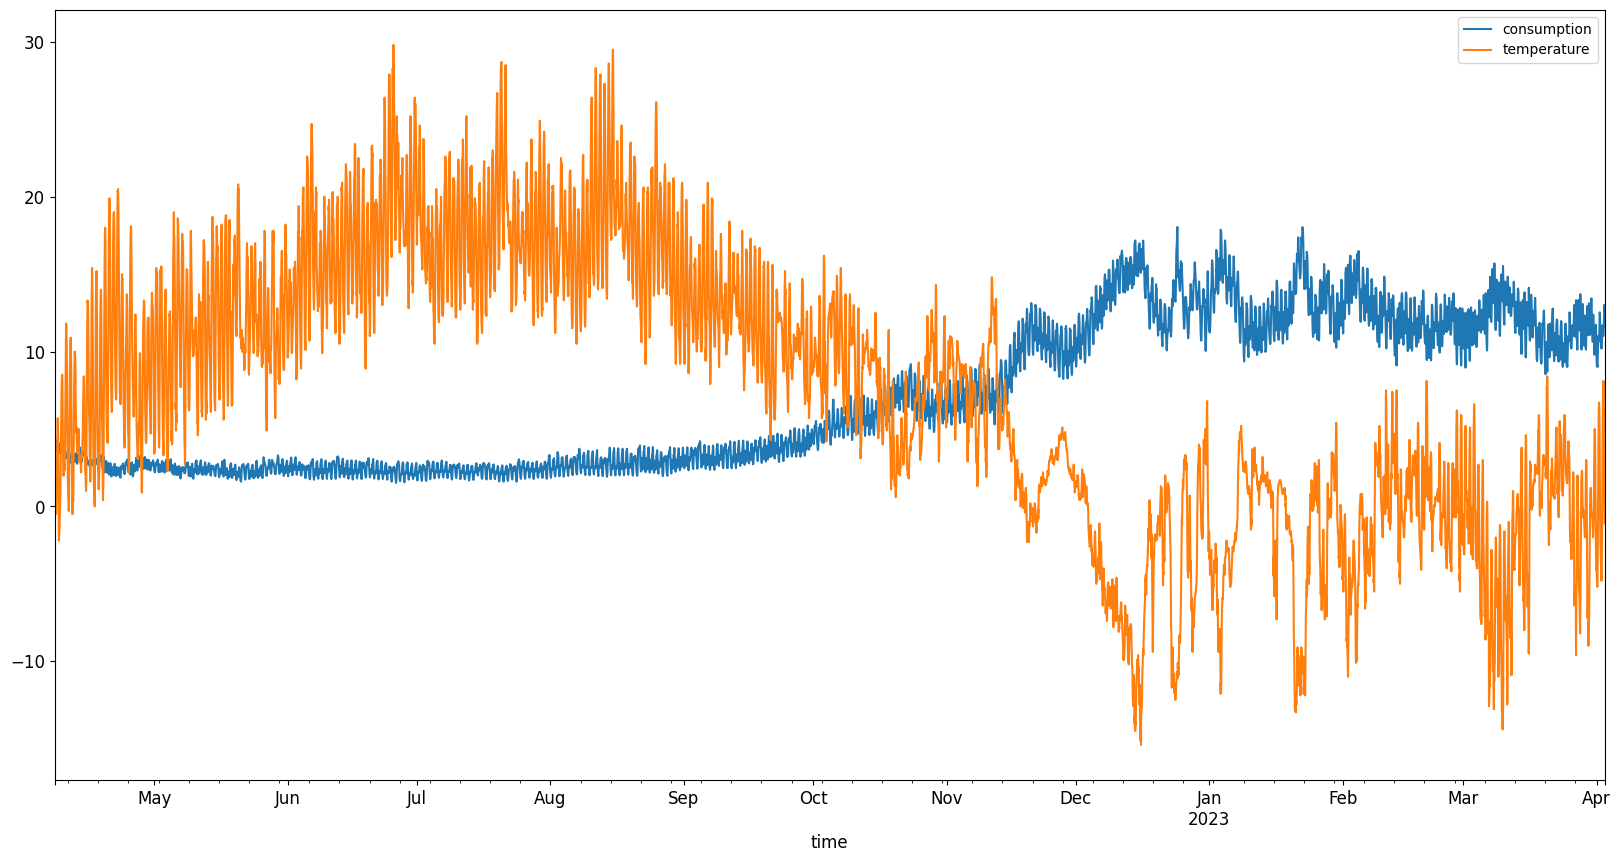

In [314]:
df = df.loc[city]
df.plot()

Very strong negative correlation with temperature:

In [315]:
df["consumption"].corr(df["temperature"])

-0.8618539884591141

Very correlated with past values

In [316]:
df["consumption"].autocorr()

0.9975159156498665

In [317]:
for interval_size in [100, 500, 1000, 5000, 10000]:
    print(f"Interval size = {interval_size} -> autocorr = {df['consumption'].iloc[:interval_size].autocorr()}")

Interval size = 100 -> autocorr = 0.9530738064772838
Interval size = 500 -> autocorr = 0.971637308618157
Interval size = 1000 -> autocorr = 0.9642773215973154
Interval size = 5000 -> autocorr = 0.9906045224780726
Interval size = 10000 -> autocorr = 0.9975159156498665


ValueError: could not broadcast input array from shape (100,) into shape (101,)

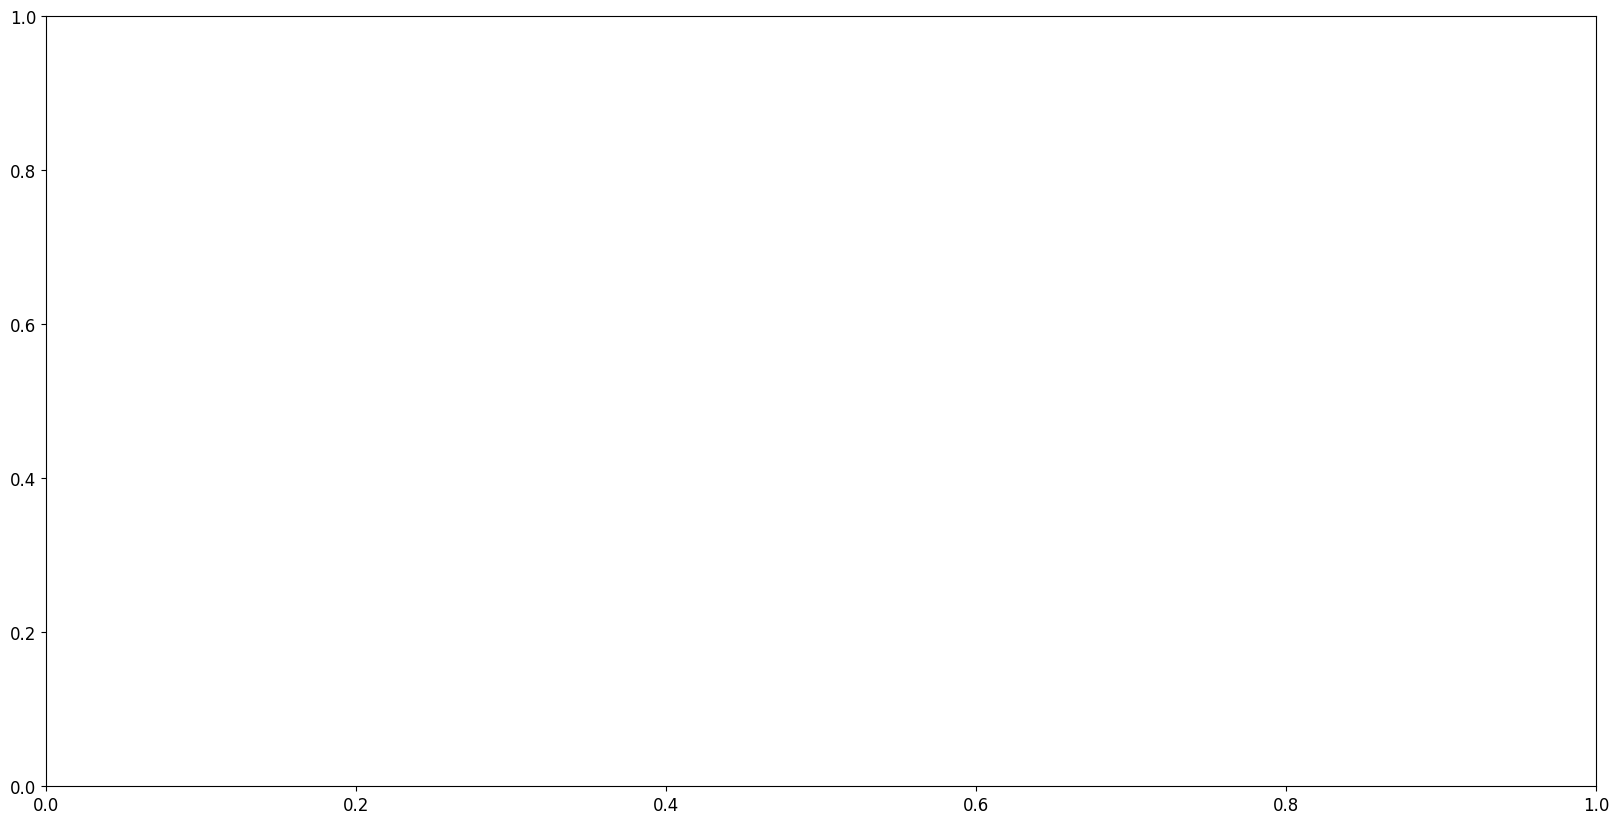

In [318]:
_ = plot_acf(df["consumption"][:300], lags=100)

Change time interval -> seasonality stays the same, but the trend changes

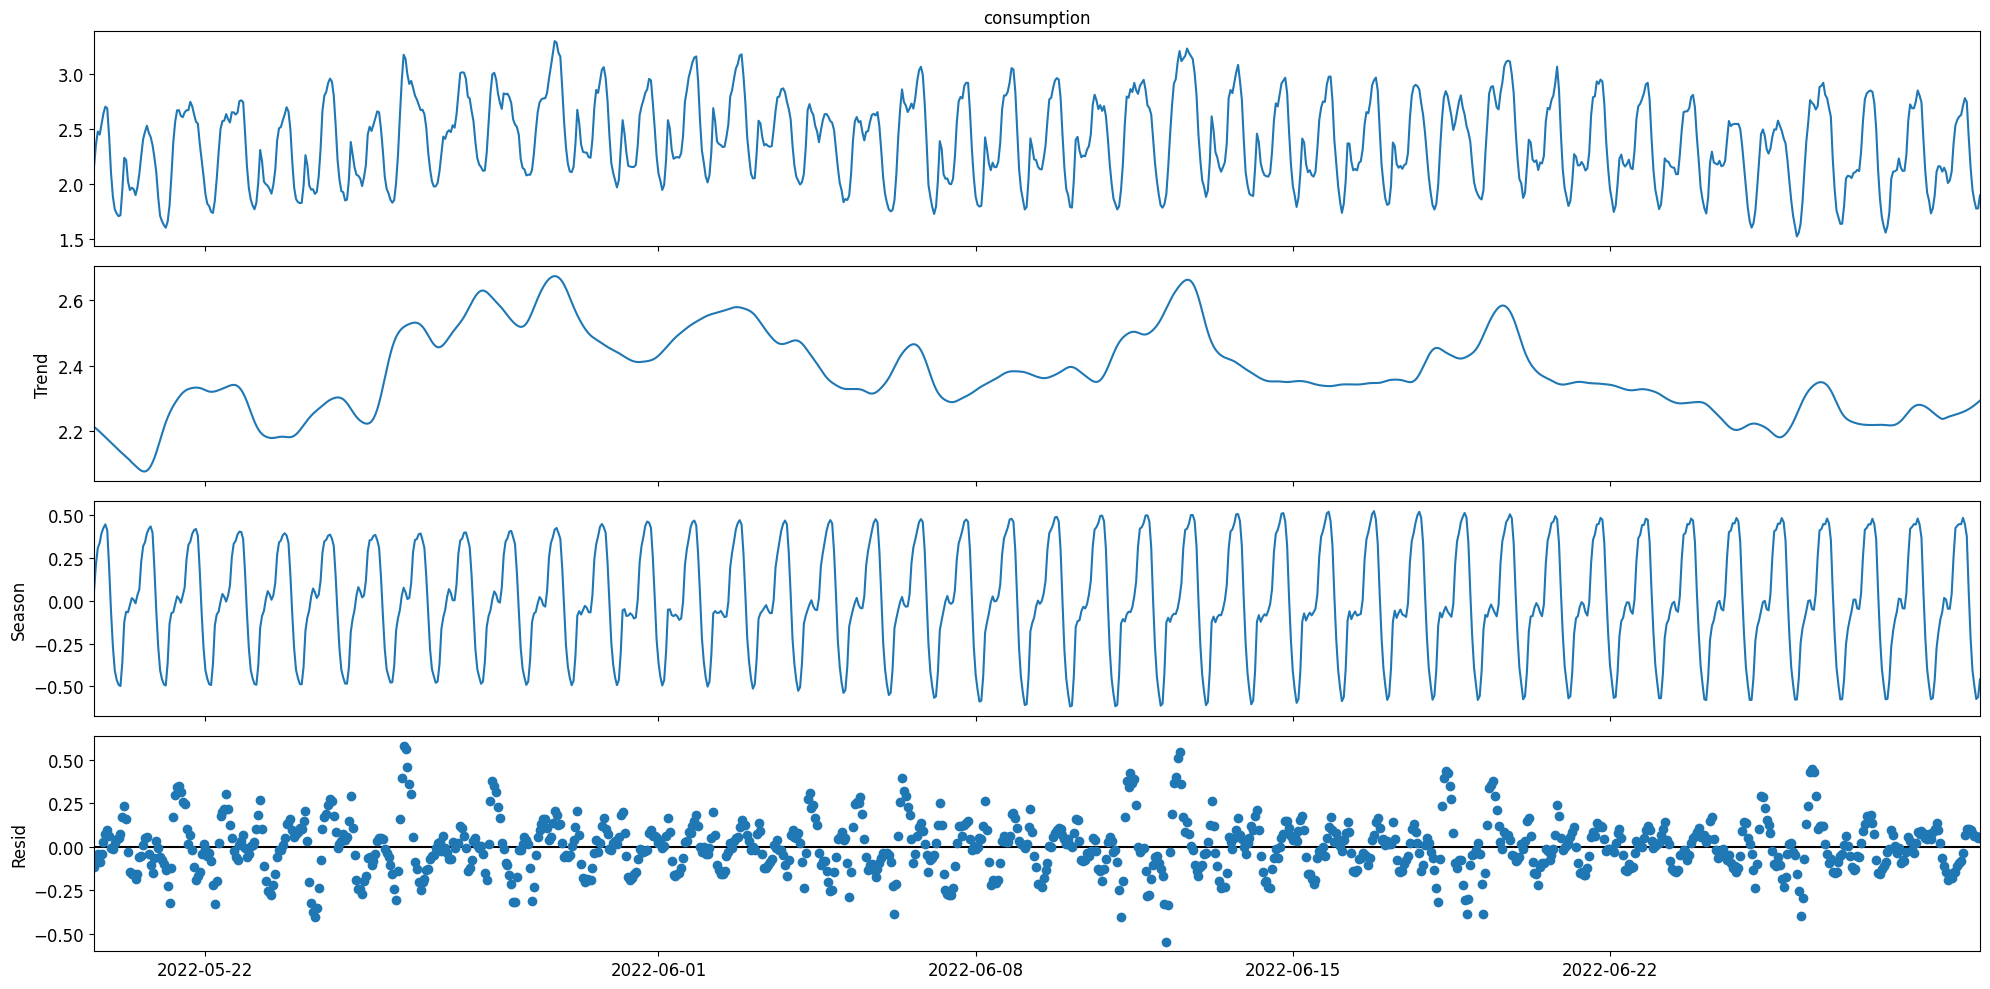

In [ ]:
s = 1000
sd = 1000
stl = STL(df["consumption"][sd:sd+s], seasonal=13)
res = stl.fit()
fig = res.plot()

In [ ]:
df["dayofweek"] = df.index.dayofweek
df["dayofyear"] = df.index.dayofyear
df["month"] = df.index.month
df["hour"] = df.index.hour
df["year"] = df.index.year

In [ ]:
df

,consumption,temperature,dayofweek,dayofyear,month,hour,year
time,,,,,,,
2022-04-07 21:00:00,4.092830,1.0,3,97,4,21,2022
2022-04-07 22:00:00,3.818095,0.4,3,97,4,22,2022
2022-04-07 23:00:00,3.660981,0.3,3,97,4,23,2022
2022-04-08 00:00:00,3.584066,0.2,4,98,4,0,2022
2022-04-08 01:00:00,3.549536,0.4,4,98,4,1,2022
...,...,...,...,...,...,...,...
2023-04-02 17:00:00,12.410225,5.5,6,92,4,17,2023
2023-04-02 18:00:00,12.856381,4.8,6,92,4,18,2023
2023-04-02 19:00:00,13.010338,0.6,6,92,4,19,2023


In [ ]:
for feature in ["dayofweek", "dayofyear", "month", "hour", "year"]:
    print(f"Consumption correlation with {feature} = {df['consumption'].corr(df[feature])}")

Consumption correlation with dayofweek = 0.023422034553851657
Consumption correlation with dayofyear = -0.17003507199754347
Consumption correlation with month = -0.17264853554638965
Consumption correlation with hour = 0.09146352670712496
Consumption correlation with year = 0.683959751981068
